<a href="https://colab.research.google.com/github/luismmachados/Portfolio_project/blob/main/tree/main/Projects/Project_04/scripts/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto


  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps


## Context

Los datos de las aplicaciones de Play Store tienen un enorme potencial para impulsar el éxito de las empresas que crean aplicaciones. **¡Se pueden extraer conocimientos prácticos para que los desarrolladores trabajen y capturen el mercado de Android!**

## Import Libraries

In [1]:
from pandas import (read_csv,
                    DataFrame,
                    to_numeric,
                    cut,
                    concat,
)

In [2]:
from numpy import (nan,
                   log10,
                   log1p,
                   array,
                   argsort,
                   float64,
)

In [3]:
from scipy.stats import stats
from scipy.stats import loguniform

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV,
)

from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              AdaBoostRegressor,
                              BaggingRegressor,
                              BaggingClassifier,
                              RandomForestClassifier,
                              GradientBoostingClassifier,
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder,
                                   StandardScaler,
                                   OrdinalEncoder,
                                   MinMaxScaler,
                                   QuantileTransformer,
                                   RobustScaler,

)

from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score,
                             accuracy_score,
)

from sklearn.pipeline import Pipeline

from sklearn.tree import (DecisionTreeRegressor,
                          DecisionTreeClassifier,
)
from sklearn.neighbors import KNeighborsRegressor

In [6]:
import matplotlib.pyplot as plt

In [7]:
from seaborn import (countplot,
                     heatmap,
                     displot,
                     kdeplot,
                     barplot,
                     scatterplot,
                     lineplot,
                     boxplot,
                     jointplot,
                     violinplot,
)

In [8]:
# Procesamiento de texto
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stopwords

In [9]:
import joblib

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerías necesarias para este proyecto.

## Pack

In [11]:
!pip install tpot
from tpot import TPOTRegressor

In [12]:
!pip install scikit_optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.1 MB/s eta 0:00:00


In [13]:
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

Paquetes necesarios para la limpieza del texto, debemos descargarlos para previamente usarlos.

## Load Data

In [ ]:
df = read_csv('/content/drive/MyDrive/Colab Notebooks/proyectos/googleplaystore.csv')
#df =  df.sample(frac=0.40)

El metodo *sample* lo use para hacer las pruebas y errores de mi modelo, ya que es un dataframe grande, para que no fuese tan largos las esperas y los ajustes necesarios

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Descargamos el dataset que usaremos y lo subimos a nuestro *Drive*, cargamos el dataset en la variable *df* e imprimimos las primeras 5 muestras

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Imprimimos la información de nuestro *dataset*, contiene 13 columnas con un total de 10841 muestras. A primera vista observamos el tipo de dato de cada columna y los valores faltantes.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


En este caso quise mostrar las estadísticas descriptivas del data set, solo se muestra la de *Rating* porque por ahora es la única columna numérica

In [ ]:
df.duplicated().sum()

483

La sumatoria total de los valores duplicados en nuestro dataset

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
nan = (df.isnull().sum() / len(df)) * 100
print(nan)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


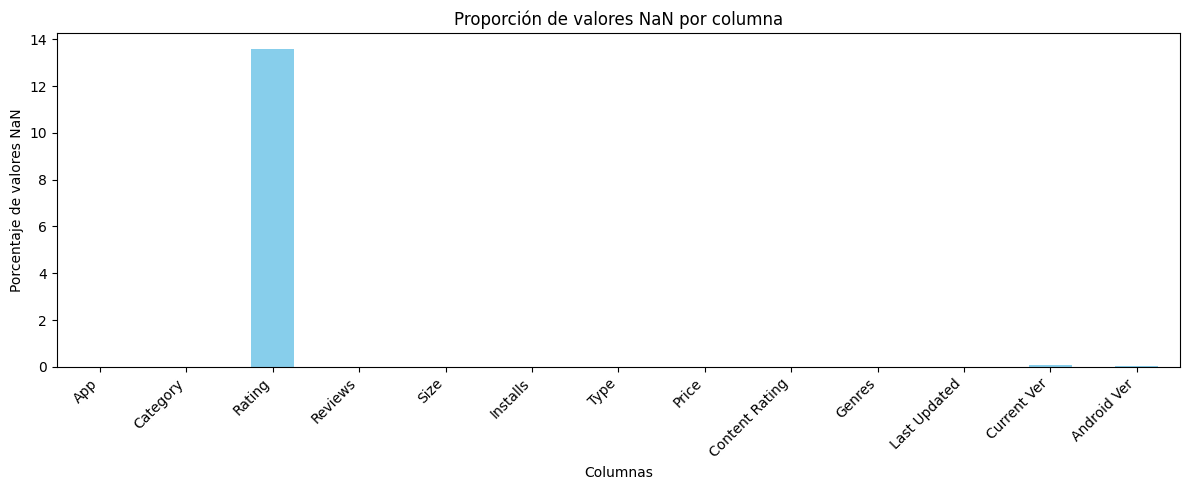

In [ ]:
plt.figure(figsize=(12, 5))
nan.plot(kind='bar', color='skyblue')
plt.title('Proporción de valores NaN por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores NaN')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observamosos los valores faltantes del dataset, primeramente el total de valores por cada columna, y luego la completitud de cada columna. La columna *Rating* cuenta con un numero considerable de valores faltantes, el resto se puede solucionar eliminandolos

<div class="alert alert-info" role="alert">
<ul>
<li> En términos generales, se suelen considerar los siguientes grados de impacto, dependiendo del porcentaje de valores faltantes (dumb rules):

- Menos de 1%: Trivial (no relevante)
- 1-5%: Manejable
- 5-15%: Manejable mediante métodos sofisticados
- Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación
    
</div>

## Data Engineering

Haremos un recorrido por las columnas de nuestro dataset, llevaremos a cabo la limpieza de cada una, dejarlas aptas para posteriormente pueda ser utilizado para nuestro modelo.

### Clean *Reviews* column

In [ ]:
df['Reviews'].dtypes

dtype('O')

In [ ]:
df['Reviews'].nunique()

6002

In [ ]:
df['Reviews'].isnull().sum()

0

In [ ]:
#def clean_numeric(num):
#    if isinstance(num, str):
#        if 'M' in num:
#            num = num.replace('M', '000')
#            num = float(num)
#            return num
#    return float(num)

#df['Reviews'] = df['Reviews'].apply(clean_numeric)
#df['Reviews'] = df['Reviews'].astype(float)

Al tratar de convertir esta columna a numerico me arrojaba un error por contener valores *string*, analizando la columna encontre una el cual contenia una *M*, así que implemente una función para limpiar dicha letra de los valores y así transformar, luego me di cuenta que era todo una muestra que estaba erronea, y la localice mediante el codigo a continuación.

In [ ]:
#df[df['Reviews'].str.contains('M', na=False)]['Reviews'].unique()
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df=df.drop(df.index[10472])
df['Reviews'] = to_numeric(df['Reviews'])

Anteriormente habia localizado dicha muestra que no correspondia, y interprete mal ese valor pensando que era *M* de milloes, pero viendo puntualmente la muestra podemos ver que esta mal ingresada ya que el valor de size y reviews estan intercambiadas, por ser una muestras solamente procederemos a eliminar.

### Clean *Size* column

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Size'].value_counts()['Varies with device']

1695

In [ ]:
df['Size'] = df['Size'].str.replace(',', '')

In [ ]:
def convert_to_MBs(size):
    if isinstance(size, str):
        if '+' in size:
            return float(size.replace('+',''))
        elif 'k' in size:
            return float(size.replace('k',''))
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024
        elif 'Varies with device' in size:
            return nan
    return (size)

df['Size'] = df['Size'].apply(convert_to_MBs) # Aplicamos la funcion

df.rename(columns={'Size': 'Size_in_MBs'}, inplace=True) # Renombramos la columna

df['Size_in_MBs'] = to_numeric(df['Size_in_MBs'], errors='coerce') # Convertimos a numerico

En la columna hay varios tipos de valores, tamaños en *Kb*, en *Mb* y otra *Varies with device* que no aporta nada, al igual que un caracter especial *+* , mediante esta función limpiaremos dicha columna eliminando los caracteres, para no perder valor de los tamaños llevaremos todo a *Mb*, aplicamos la función, renombramos la columna y convertimos a numerico

In [ ]:
df['Size_in_MBs'] = df['Size_in_MBs'].apply(lambda x: x * 1000 if x < 10 else x)
df['Size_in_MBs']=df['Size_in_MBs']/1000
df['Size_in_MBs'] = round(df['Size_in_MBs'], 2)

Acá con lambda los valores menores a 10 los lo multiplicamos por mil y los mayores quedan igual, de manera que podamos interpretar las muestras correctamente entre *mb* y *kb*, por ultimo dividimos entre mil y el resultado lo quisiera con dos decimales asi que le aplico un *round*

### Clean *Installs* column

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Installs'].value_counts().head()

Installs
1,000,000+     1579
10,000,000+    1252
100,000+       1169
10,000+        1054
1,000+          907
Name: count, dtype: int64

In [ ]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].apply(lambda x: x.replace('Free', '0'))
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', ''))
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df['Installs'].value_counts().head()

Installs
1000000     1579
10000000    1252
100000      1169
10000       1054
1000         907
Name: count, dtype: int64

En esta columna en la cual contiene el total de instalaciones de cada aplicación, contiene un carácter especial que es (*+*), igualmente el tipo de dato en *object*, observamos los valores únicos de la columna y contiene uno que es (*free*), con una función limpiaremos de carácteres especiales y dicho valor *free* que sea reemplazado por un *0* y cambiamos el tipo de dato a numérico.

### Clean *Price* column

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'].value_counts().head(10)

Price
0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
$3.99       63
$1.49       46
$5.99       30
$2.49       26
$9.99       21
Name: count, dtype: int64

In [ ]:
#df['Price'].value_counts()['Everyone']

In [ ]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', ""))
df['Price'] = df['Price'].apply(lambda x: x.replace('Everyone', "0"))

In [ ]:
df['Price'] = to_numeric(df['Price'])

In [ ]:
df['Price'].value_counts().head()

Price
0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
Name: count, dtype: int64

Esta columna representa el precio de cada aplicaciòn, podemos ver que cuenta con un caracter especial (*$*), cuenta con 93 valores unicos y uno en especial llamado (*everyone*). Reemplazamos el caracter especial por un espacio al igual que el valor (*everyone*) por un espacio. Posterior a eso cambiamos el tipo de dato a numerico.

### Clean text

In [ ]:
def clean_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()

    # Eliminar stopwords
    stopwords_list = stopwords.words('english')
    STOPWORDS = set(stopwords_list)
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # Eliminar direcciones de correo electrónico
    text = re.sub('@[^\s]+', ' ', text)

    # Eliminar URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)

    # Eliminar números
    text = re.sub('[0-9]+', ' ', text)

    # Eliminar puntuaciones
    translator = str.maketrans(' ' , ' ', string.punctuation)
    text = text.translate(translator)
    text = text.replace('-', ' ')

    return text

In [ ]:
df['Category'] = df['Category'].apply(lambda text: clean_text(text))
df['App'] = df['App'].apply(lambda text: clean_text(text))
df['Genres'] = df['Genres'].apply(lambda text: clean_text(text))

### Correlation matrix

In [ ]:
df['Reviews_per_Install'] = df['Reviews'] / df['Installs']

Por alta relación entre los features de *reseñas* y *instalaciones* creare un feature nuevo para ver si nos arroja algo interesante.

In [ ]:
numeric_cols = ['Rating', 'Reviews' ,'Size_in_MBs', 'Installs', 'Price', 'Reviews_per_Install']

Selecionaremos solamente los features numericos para aplicarle una correlación

<Axes: title={'center': 'Correlation of Seven Columns'}>

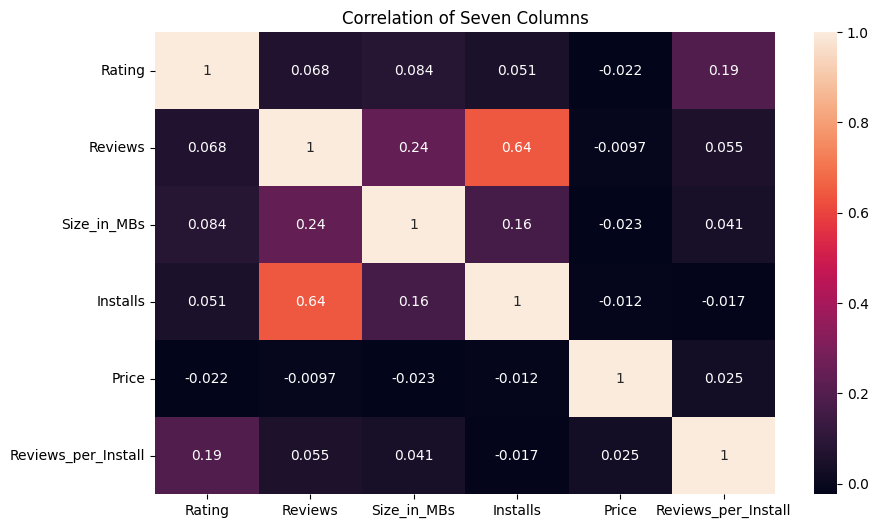

In [ ]:
plt.figure(figsize=(10,6))

plt.title("Correlation of Seven Columns")
heatmap(df[numeric_cols].corr(),annot=True)

Mediante esta grafica de matriz de correlación, observamos dos columnas con alta correlación, es logico ya que mientras mas instalaciones tenga una aplicación, mas reseñas tendra, seguido una pequeña relación con el tamaño de la aplicación, las otros features mantienen una relación muy pequeña. Luego de crear un nuevo feature nos arroja una leve relación con nuestra variable objetivo.

### Head

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  10840 non-null  object 
 1   Category             10840 non-null  object 
 2   Rating               9366 non-null   float64
 3   Reviews              10840 non-null  int64  
 4   Size_in_MBs          9145 non-null   float64
 5   Installs             10840 non-null  int64  
 6   Type                 10839 non-null  object 
 7   Price                10840 non-null  float64
 8   Content Rating       10840 non-null  object 
 9   Genres               10840 non-null  object 
 10  Last Updated         10840 non-null  object 
 11  Current Ver          10832 non-null  object 
 12  Android Ver          10838 non-null  object 
 13  Reviews_per_Install  10825 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_per_Install
0,photo editor candy camera grid scrapbook,artanddesign,4.1,159,19.46,10000,Free,0.0,Everyone,art design,"January 7, 2018",1.0.0,4.0.3 and up,0.015900
1,coloring book moana,artanddesign,3.9,967,14.34,500000,Free,0.0,Everyone,art designpretend play,"January 15, 2018",2.0.0,4.0.3 and up,0.001934
2,u launcher lite – free live cool themes hide apps,artanddesign,4.7,87510,8.91,5000000,Free,0.0,Everyone,art design,"August 1, 2018",1.2.4,4.0.3 and up,0.017502
3,sketch draw paint,artanddesign,4.5,215644,25.60,50000000,Free,0.0,Teen,art design,"June 8, 2018",Varies with device,4.2 and up,0.004313
4,pixel draw number art coloring book,artanddesign,4.3,967,2.87,100000,Free,0.0,Everyone,art designcreativity,"June 20, 2018",1.1,4.4 and up,0.009670


Asì va quedando nuestro dataset luego de la *limpieza*

### Treatment missing values

In [ ]:
df.isnull().sum() / len(df) * 100

App                     0.000000
Category                0.000000
Rating                 13.597786
Reviews                 0.000000
Size_in_MBs            15.636531
Installs                0.000000
Type                    0.009225
Price                   0.000000
Content Rating          0.000000
Genres                  0.000000
Last Updated            0.000000
Current Ver             0.073801
Android Ver             0.018450
Reviews_per_Install     0.138376
dtype: float64

Tenemos dos columnas las cuales cuentan con gran cantidad de valores nulos, la columna *Size in Kbs* antes de limpiarla no contaba con valores nulos, en este caso tenia un valor de nombre *Varies with device* el cual no aporta nada de información, ademas que se repite *1694* veces, lo que hace el 15%; llevaremos a cabo una imputación a dicha columna y eliminaremos la del resto. La columna *Rating* cuenta con mas del 13% de valores nulos, como cuenta con una gran porcentaje de valores nulos estaba pensando en tratarla igual que la columna *Size*, pero en este caso al ser una columna de satisfacción no podria suponer dichas valoraciones, así que en este caso para dicha columna eliminare los valores nulos.

In [ ]:
df.dropna(subset=['Rating', 'Type'],inplace=True)

In [ ]:
df.isnull().sum() / len(df) * 100

App                     0.000000
Category                0.000000
Rating                  0.000000
Reviews                 0.000000
Size_in_MBs            17.478112
Installs                0.000000
Type                    0.000000
Price                   0.000000
Content Rating          0.000000
Genres                  0.000000
Last Updated            0.000000
Current Ver             0.042708
Android Ver             0.021354
Reviews_per_Install     0.000000
dtype: float64

### Duplicated Data

In [ ]:
df.shape

(9366, 14)

In [ ]:
df.duplicated().sum()

474

Observamos los valores duplicados en nuestro dataset, por ahora contamos con *316* valores duplicados

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(8892, 14)

Borramos los valores duplicados para que no interfieran con los analisis posteriores de nuestro dataset, y luego imprimimos nuestro el *shape*

### Imputer *Size_in_MBs* column

In [ ]:
imputer = IterativeImputer(estimator=RandomForestRegressor(),
                           max_iter=100,
                           random_state=760)
df['Size_in_MBs'] = imputer.fit_transform(df[['Size_in_MBs']])

Estuve investigando metodos de imputaciòn para columnas las cuales contengan una cantidad considerable de valores nulos, en las librerias de *sklearn* encontre un método de imputación avanzado que utiliza un modelo de aprendizaje automático para estimar los valores faltantes en un conjunto de datos. Como estimador usaremos *bosque aleatorio de regresion*, ajustamos con la columna la cual vamos a imputar y transformamos dicha columna.

In [ ]:
df.isnull().sum() / len(df) * 100

App                    0.000000
Category               0.000000
Rating                 0.000000
Reviews                0.000000
Size_in_MBs            0.000000
Installs               0.000000
Type                   0.000000
Price                  0.000000
Content Rating         0.000000
Genres                 0.000000
Last Updated           0.000000
Current Ver            0.044984
Android Ver            0.022492
Reviews_per_Install    0.000000
dtype: float64

Columna del tamaño de la app totalmemte limpio.

### Imputer *Reviews_per_Install* column


In [ ]:
impute = IterativeImputer(estimator=RandomForestRegressor(),
                           max_iter=100,
                           random_state=760)
df['Reviews_per_Install'] = impute.fit_transform(df[['Reviews_per_Install']])

Aplicaremos la misma función de imputación pero esta vez para el nuevo feature. Al crear el nuevo feature, al contener valores en 0 en dichos feature, al dividirlas arroja un *Nan*

## Univariate analysis

In [ ]:
df.shape, df.columns

((8892, 14),
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_MBs', 'Installs',
        'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
        'Current Ver', 'Android Ver', 'Reviews_per_Install'],
       dtype='object'))

A continuación analizaremos las columnas para conocerlas mejor y que información podemos sacar de ellas.

### *App* column

In [ ]:
df['App'].nunique()

8121

Mostramos los valores unicos de esta columna, la cual contiene 8434 valores unicos

In [ ]:
df['App'].dtype

dtype('O')

Observamos el tipo de dato de la columna, que en este caso es de tipo *Object*

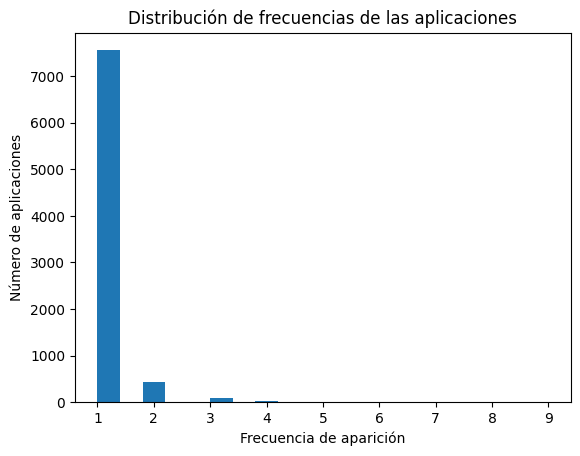

In [ ]:
plt.hist(df['App'].value_counts(), bins=20)
plt.xlabel('Frecuencia de aparición')
plt.ylabel('Número de aplicaciones')
plt.title('Distribución de frecuencias de las aplicaciones')
plt.show()

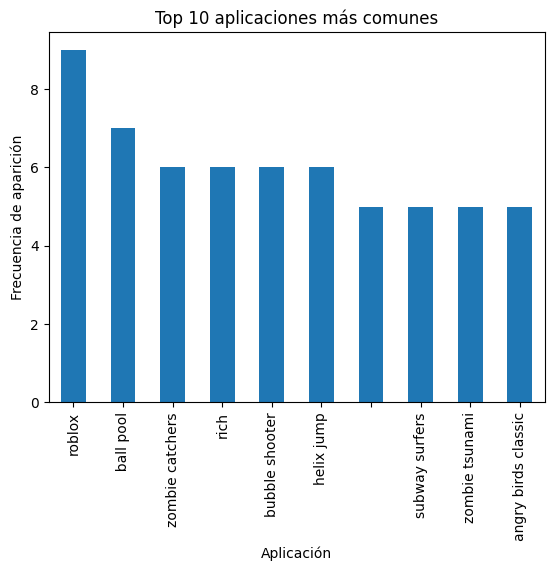

In [ ]:
df['App'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Aplicación')
plt.ylabel('Frecuencia de aparición')
plt.title('Top 10 aplicaciones más comunes')
plt.show()

Mediante un histograma y un grafico de barras, podemos observar las primeras 10 muestras, de las aplicaciones las cuales se repiten más, dejando a *ROBLOX* de primero, siendo la aplicación que mas se repite.

### *Category* column

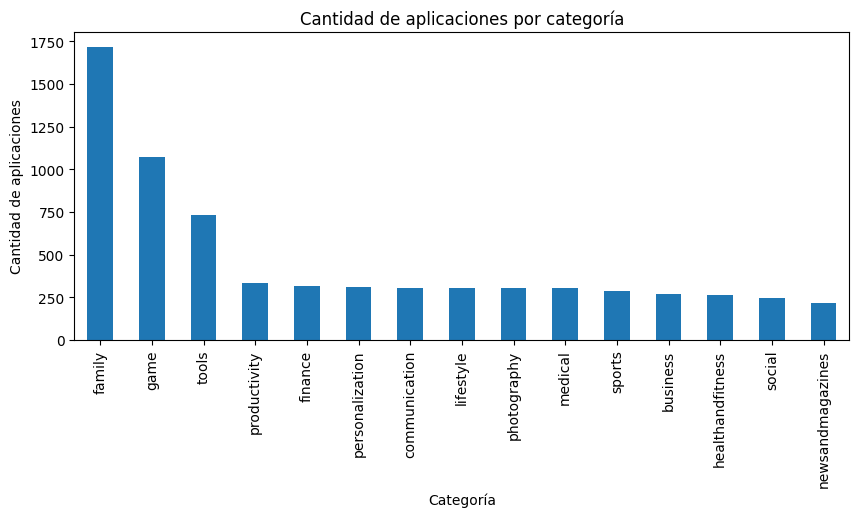

In [ ]:
plt.figure(figsize=(10,4))
df['Category'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de aplicaciones')
plt.title('Cantidad de aplicaciones por categoría')
plt.xticks(rotation=90)
plt.show()

Acá en la columna *Categoria* y mediante una grafica de barras, podemos observar 10 muestras, las cuales representan las 10 categorias de aplicaciones que mas veces se repiten, siendo la categoria *familia* la categoria que mas veces se repite en nuestro conjunto de datos.

### *Rating* column

In [ ]:
df['Rating'].describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Mostramos las estadisticas descriptivas de nuestra columna *Calificación*, vemos la media de casi 4.2, eso es bueno ya que nos indica que mayormente las valoraciones de las aplicaciones son buenas; el puntaje minimo de 1 y la maxima de 5, los cuartiles igualmente nos indica valores sobre 4, que nos rectifica dicha hipotesis sobre las valoraciones

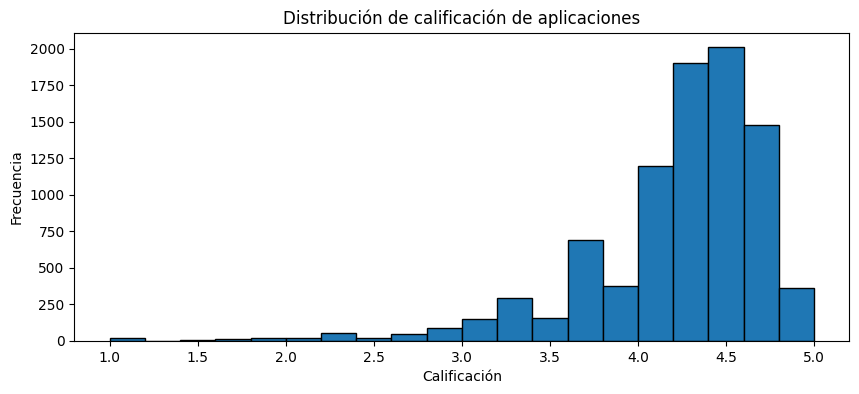

In [ ]:
plt.figure(figsize=(10,4))

plt.hist(df['Rating'], bins=20, edgecolor='black')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificación de aplicaciones')
plt.show()

<Axes: xlabel='Rating', ylabel='Density'>

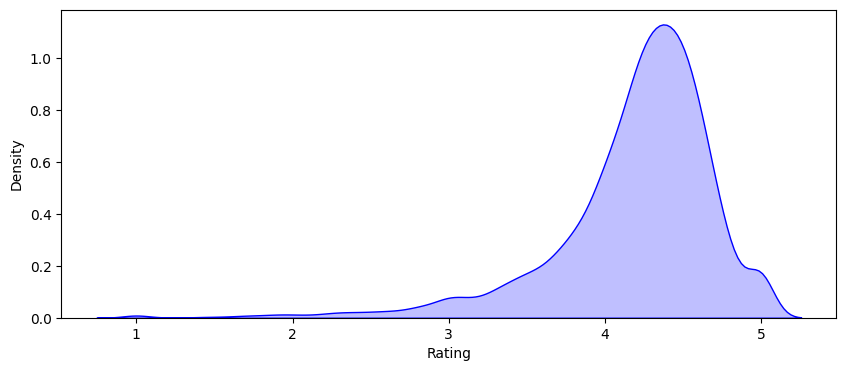

In [ ]:
plt.figure(figsize=(10,4))
kdeplot(df['Rating'],color='blue', fill=True)

Mediante la grafica de densidad y el histograma, podemos observar que la concentración de valores se encuentra sobre la calificación 4, tal cual lo que nos indico las estadisticas descriptivas

### *Reviews* column

In [ ]:
df['Reviews'].describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Observamos las primeras 10 muestras de nuestra columna *Reseñas* y tambien las estadisticas descriptivas; Nos muestra el total de observaciones de la columna, la desviación estandar que en este caso hay una gran dispersión de valores con respecto a la media, la media nos arroja un 4% de reseñas por aplicación, siendo un maximo de casi 7.8% de reseñas por aplicación, al igual que la minima de 0 reseñas.

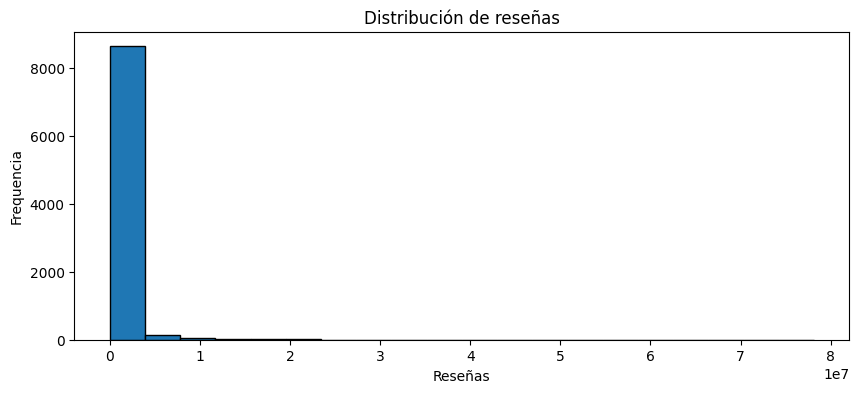

In [ ]:
plt.figure(figsize=(10,4))

plt.hist(df['Reviews'], bins=20, edgecolor='black')
plt.xlabel('Reseñas')
plt.ylabel('Frequencia')
plt.title('Distribución de reseñas')
plt.show()

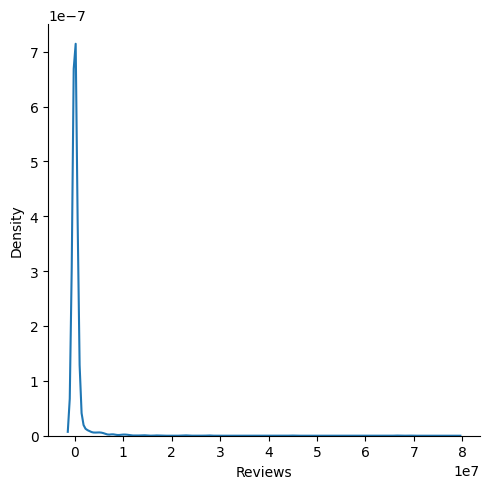

In [ ]:
displot(data=df, x='Reviews', kind="kde")

Las ultimas dos graficas no nos arroja mucho, se entiende que la gran mayoria de las aplicaciones cuentan con una reseña, y la pequeña minoria cuentan con 2 o mas reseñas.

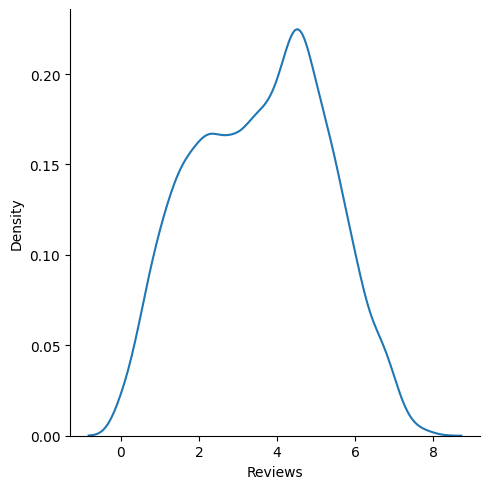

In [ ]:
displot(data=df, x=log10(df['Reviews']), kind="kde")

Podemos ver en las graficas una notación científica, eso significa que
 la densidad de los datos de una region es muy baja y no nos deja apreciar bien la grafica; para observarlo mejor, de la libreria de *Numpy* usaremos la función *log10* la cual nos arroja el logaritmo en base 10 de la matriz de entrada, seria como escalar dicha region de datos para poder observarlo mejor; Y ahora si podemos ver la grafica de densidad mucho mejor, que abala un poco lo que nos arrojaba las estadisticas descriptivas.

### *Size* column

In [ ]:
df['Size_in_MBs'].describe()

count    8892.000000
mean       23.294395
std        21.926279
min         0.010000
25%         6.450000
50%        20.480000
75%        27.650000
max       102.400000
Name: Size_in_MBs, dtype: float64

Ahora las estadisticas descriptivas de nuestra columna de *Size_in_MBs*, que seria el tamaño de cada aplicación, el tamaño promedio de las aplicaciones esta en 23 Mb, contiene una alta dispersión con respecto a la media, ya que el tamaño minimo es de unos pocos kb y el mayor esta en mayor a 100 mb, y los rangos intercuartilicos nos indica que el 75% de los valores estan bajo los 27 Mb

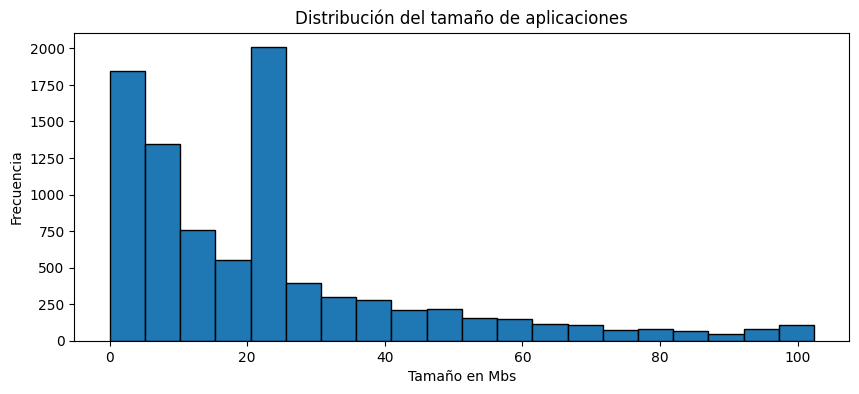

In [ ]:
plt.figure(figsize=(10,4))

plt.hist(df['Size_in_MBs'], bins=20, edgecolor='black')
plt.xlabel('Tamaño en Mbs')
plt.ylabel('Frecuencia')
plt.title('Distribución del tamaño de aplicaciones')
plt.show()

Mediante un histograma nos ayuda a entender más lo ultimo mencionado, la concentración de muestras estan bajo los 30 mb, luego son pocos lo que superan dicho tamaño.

### *Installs* column

In [ ]:
df['Installs'].describe()

count    8.892000e+03
mean     1.648965e+07
std      8.637600e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Veremos las estadisticas descriptivas de nuestra columna *Instalaciones*; Viendo la desviación estandar la cual es bastante alta, nos indica una alta dispersión de valores con respecto a la media, es decir, el valor maximo esta muy alejado de los rangos intercuartilicos que son notablemente mas bajos

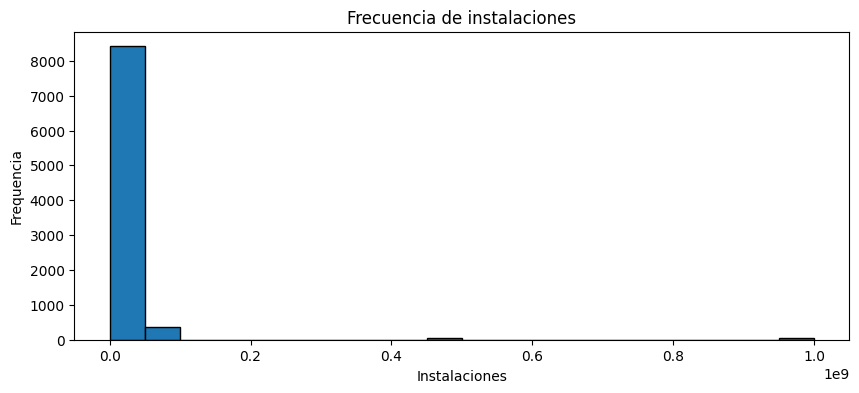

In [ ]:
plt.figure(figsize=(10,4))

plt.hist(df['Installs'], bins=20, edgecolor='black')
plt.xlabel('Instalaciones')
plt.ylabel('Frequencia')
plt.title('Frecuencia de instalaciones')
plt.show()

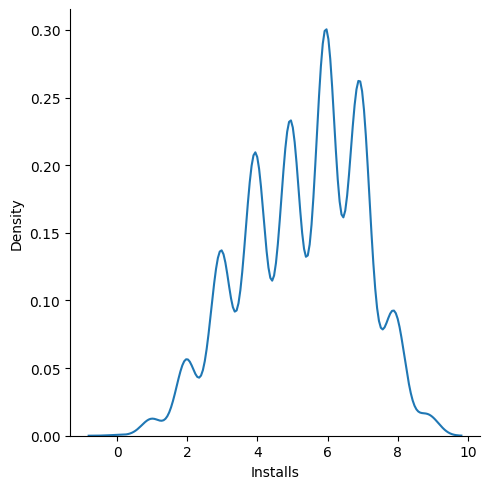

In [ ]:
displot(data=df, x=log10(df['Installs']), kind="kde")
plt.show()

No se puede apreciar bien en el histograma por su gran cantidad de muestras altas, le aplicaremos una grafica de densidad al logaritmo base 10 para estandarizar los valores, logramos ver que fluctua mucho. la mayoría de las aplicaciones tiene un número moderado de instalaciones, pero hay algunas aplicaciones muy populares que elevan significativamente el promedio.

### *Type* column

In [ ]:
df['Type'].value_counts()

Type
Free    8279
Paid     613
Name: count, dtype: int64

En este caso observaremos la columna *Tipo* que se refiere al tipo de aplicación, si es una aplicación *Paga* o *Gratuita*; Es una columna desbalanceada pero esperable, ya que la mayoria de las aplicaciones son gratuitas.

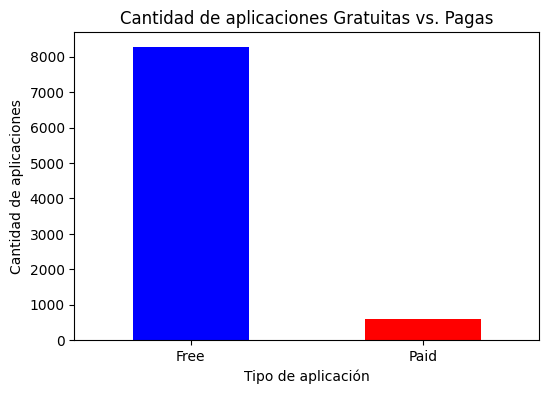

In [ ]:
plt.figure(figsize=(6,4))
df['Type'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Tipo de aplicación')
plt.ylabel('Cantidad de aplicaciones')
plt.title('Cantidad de aplicaciones Gratuitas vs. Pagas')
plt.xticks(rotation=0)
plt.show()

Acá en esta grafica de barras observamos que sobre las 8mil observaciones son gratuitas frente a la pequeña minoria de aplicaciones pagas.

([<matplotlib.patches.Wedge at 0x7b94d74b9390>,
 [Text(-1.0743027712831958, 0.23637587781591737, 'Free'),
  Text(1.0743027712831958, -0.2363758778159175, 'paid')],
 [Text(-0.585983329790834, 0.12893229699050038, '93.1%'),
  Text(0.585983329790834, -0.12893229699050043, '6.9%')])

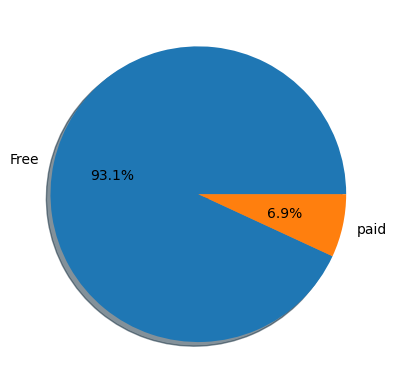

In [ ]:
labels = 'Free', 'paid'

fig, ax = plt.subplots()
ax.pie(df['Type'].value_counts(),
       labels=labels,
       shadow=True,
       autopct='%1.1f%%')

Y esta grafica de pastel, con 92.2% las aplicaciones pagas frente al 7.8% de aplicaciones pagas.

### *Price* column

In [ ]:
df['Price'].describe()

count    8892.000000
mean        0.963155
std        16.189341
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

La mayoria de las aplicaciones son gratuitas, así que viendo las estadisticas descriptivas podemos ver una alta desviación estandar con respecto a la media, es logico ya que el valor maximo se aleja muchisimo de los rangos intercuartilicos

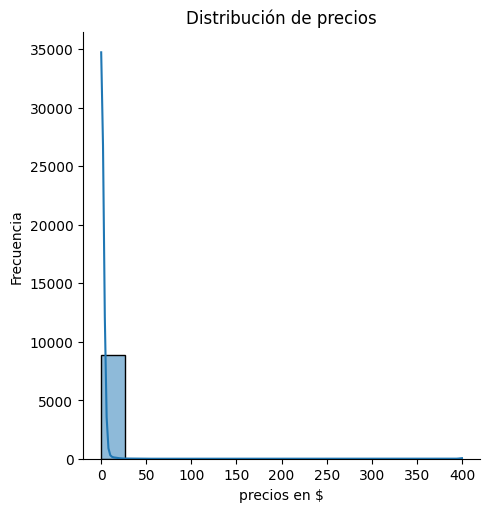

In [ ]:
displot(df['Price'], kde=True)
plt.title('Distribución de precios')
plt.xlabel('precios en $')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


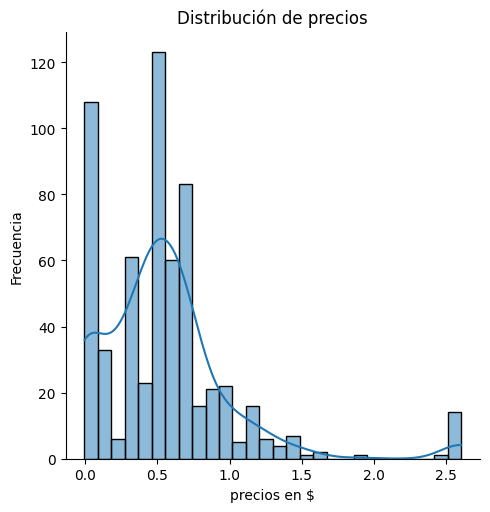

In [ ]:
displot(log10(df['Price']), kde=True)
plt.title('Distribución de precios')
plt.xlabel('precios en $')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar que en su mayoria las aplicaciones son gratuitas, la media nos indica que las aplicaciones pagas son casi de 1 dolar, nos indica que la mayor concentración se encutra bajo 1 dolar

### *Genres* column

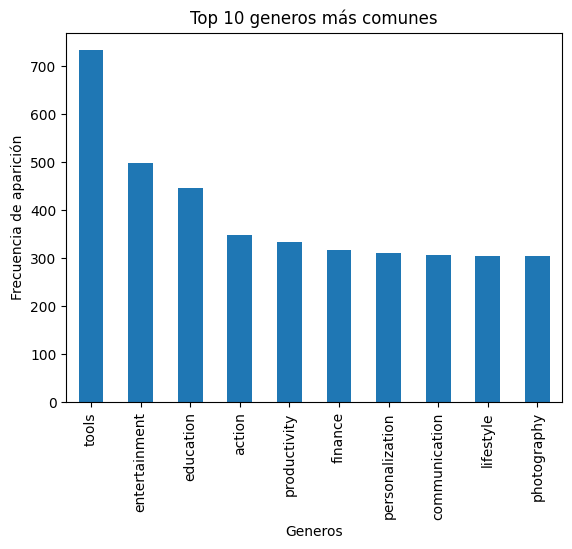

In [ ]:
df['Genres'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Generos')
plt.ylabel('Frecuencia de aparición')
plt.title('Top 10 generos más comunes')
plt.show()

Luego esta grafica de barras, mostramos la frecuencia la cual cada elemento de la columna *Genero* se repite más, con más de 700 coincidencias es *Tools* de primero, seguido de *Entertainment* con un poco mas de 500 coincidencias.

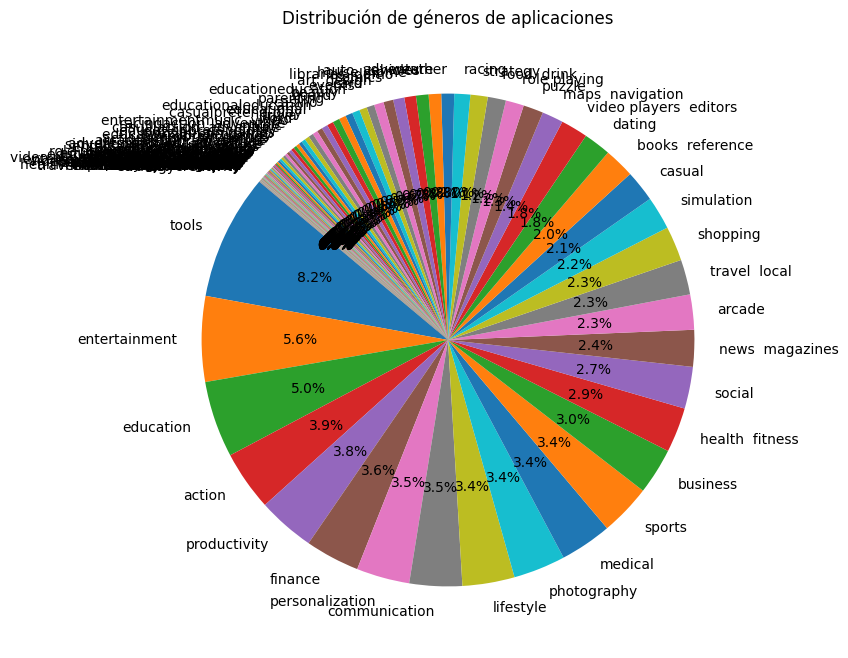

In [ ]:
# Graficar
plt.figure(figsize=(8,8))
df['Genres'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de géneros de aplicaciones')
plt.ylabel('')
plt.show()

### *Content rating* column

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
df['Content Rating'].value_counts() / len(df['Content Rating'])

Content Rating
Everyone           0.797908
Teen               0.114935
Mature 17+         0.046221
Everyone 10+       0.040486
Adults only 18+    0.000337
Unrated            0.000112
Name: count, dtype: float64

Mostramos los valores unicos de la columna *Content Rating*, al igual podemos observar la cantidad de coincidencias de cada valor unico entre todas las muestras, dejando a *Everyone* con mas del 80% de coincidencias, luego a *Teen* con un 10%, Solo 2 no estaban calificadas y 2 con contenido para mayores de 18 años.

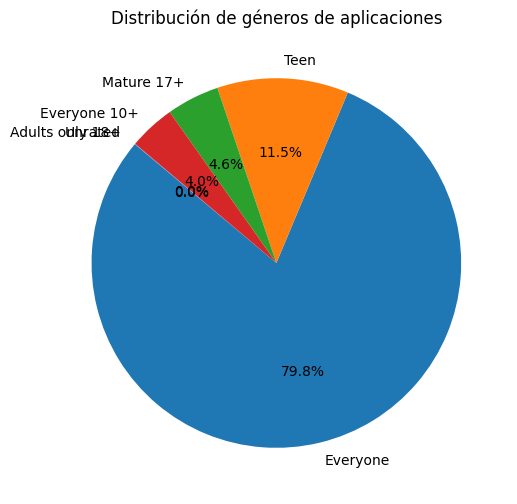

In [ ]:
plt.figure(figsize=(6,6))
df['Content Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de géneros de aplicaciones')
plt.ylabel('')
plt.show()

## Bivariate analysis

In [ ]:
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Grafica de dispersión {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

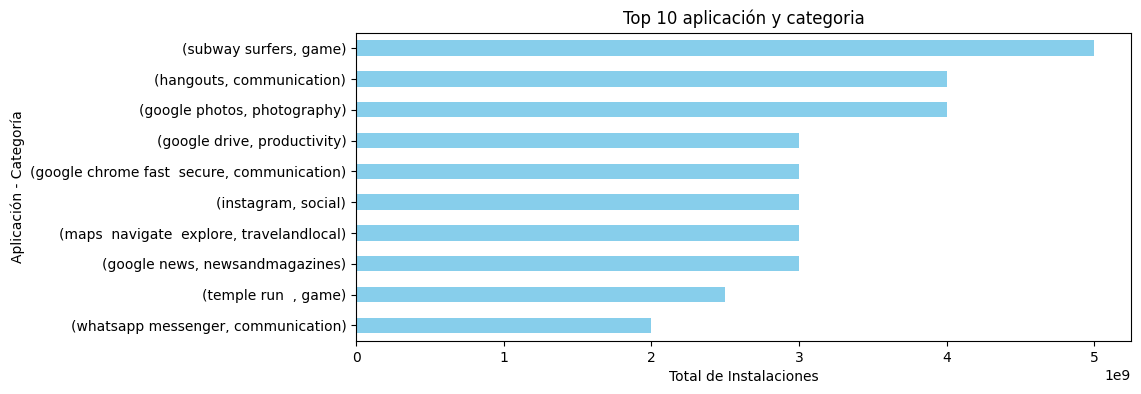

In [ ]:
top_10_installs = df.groupby(['App', 'Category'])['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
top_10_installs.plot(kind='barh', color='skyblue')
plt.xlabel('Total de Instalaciones')
plt.ylabel('Aplicación - Categoría')
plt.title('Top 10 aplicación y categoria')
plt.gca().invert_yaxis()  # Invertir el eje y para que las barras más grandes estén arriba
plt.show()

En la grafica podemos observar la aplicación y la categoria con mayor numero de instalaciones.

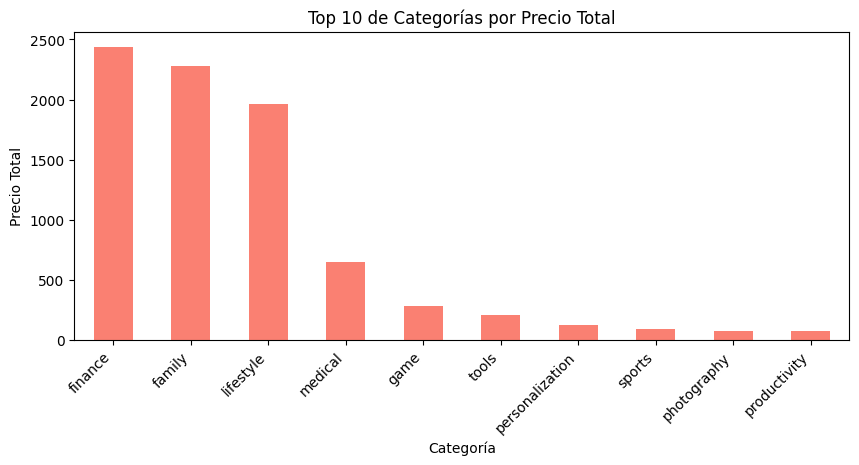

In [ ]:
top_10_prices  = df.groupby('Category')['Price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
top_10_prices.plot(kind='bar', color='salmon')
plt.xlabel('Categoría')
plt.ylabel('Precio Total')
plt.title('Top 10 de Categorías por Precio Total')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

Podemos ver 10 muestras de las categorias las cuales cuentan con el mayor precio pagado por la aplicacion, siendo *FINANCE* la categoria la cual mas dinero se gasta.

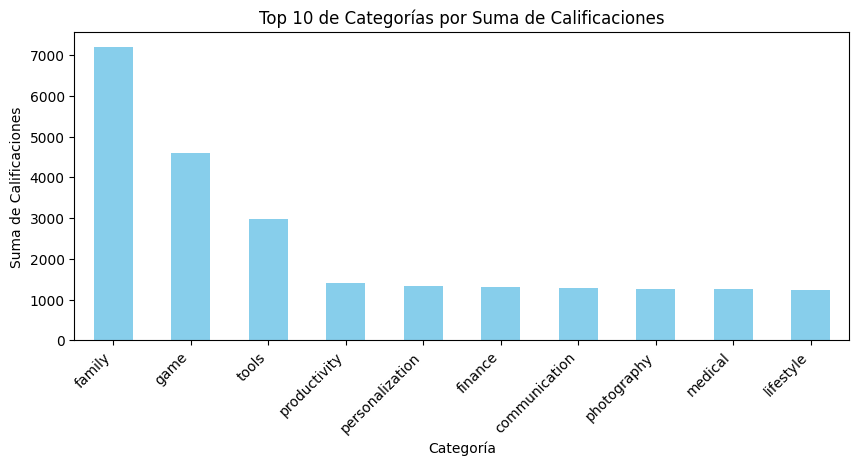

In [ ]:
top_10_ratings  = df.groupby('Category')['Rating'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
top_10_ratings.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Suma de Calificaciones')
plt.title('Top 10 de Categorías por Suma de Calificaciones')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

Observemos las 10 primeras muestras de las categorias las cuales tienen mayor puntaje, siendo *FAMILY* la categoria la cual contiene mas numero de calificaciones

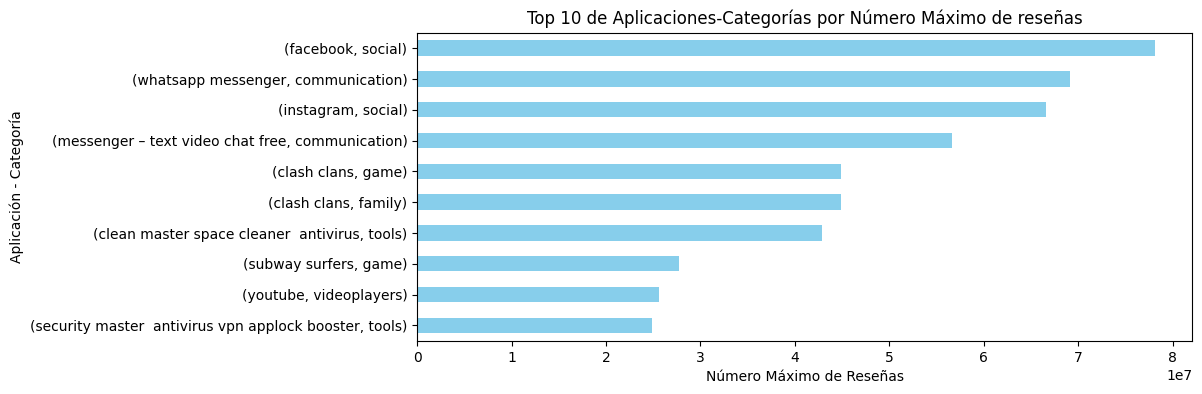

In [ ]:
top_10_reviews  = df.groupby(['App', 'Category'])['Reviews'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
top_10_reviews.plot(kind='barh', color='skyblue')
plt.xlabel('Número Máximo de Reseñas')
plt.ylabel('Aplicación - Categoría')
plt.title('Top 10 de Aplicaciones-Categorías por Número Máximo de reseñas')
plt.gca().invert_yaxis()  # Invertir el eje y para que la barra más larga esté arriba
plt.show()


Acá podemos observar las aplicaciones y su categoria, las cuales cuentan con mayor numero de reseñas

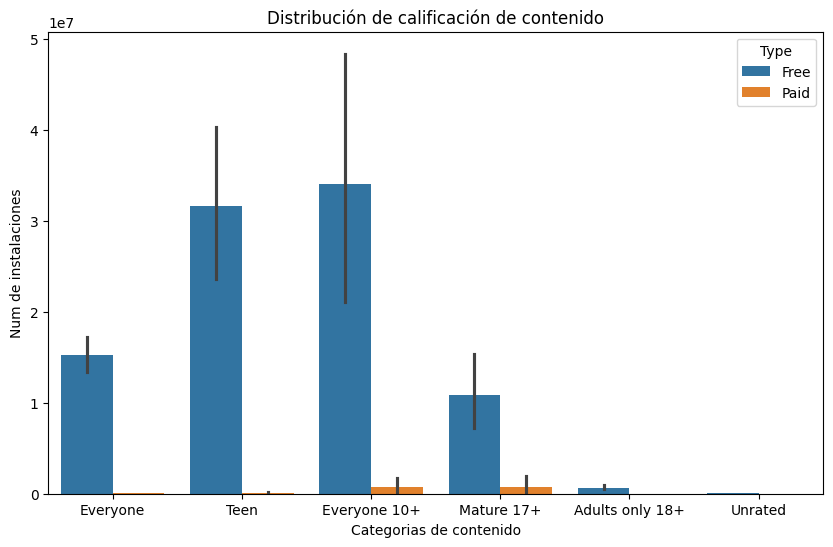

In [ ]:
plt.figure(figsize=(10, 6)) # make figure size
barplot(x='Content Rating', y='Installs', hue="Type", data=df)
plt.title('Distribución de calificación de contenido')
plt.xlabel('Categorias de contenido')
plt.ylabel('Num de instalaciones')
plt.show()

Con esta grafica podemos ver que aquellas aplicaciones de categoria *Everyone 10+* son las que mas cuentan con numero de instalaciones

<Axes: xlabel='App', ylabel='Rating'>

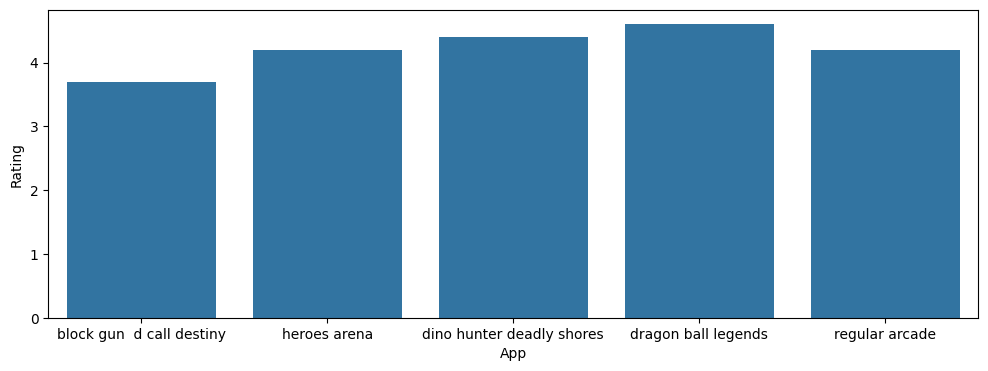

In [ ]:
plt.figure(figsize=(12,4))
barplot(x='App',y='Rating',data=df[df['Type']=='Free'].sort_values(by='Genres',ascending=True).head(5))


Especificamos nuestros ejes X(*App*) y Y(*Rating*), luego se seleccionan solo las filas donde el valor en la columna 'Type' es 'Free'y lo ordenamos de forma ascendente, muestra un gráfico de barras que representa las clasificaciones ('Rating') de las 5 aplicaciones ('App') con el valor 'Free' en la columna 'Type', ordenadas según la columna 'Genres'.

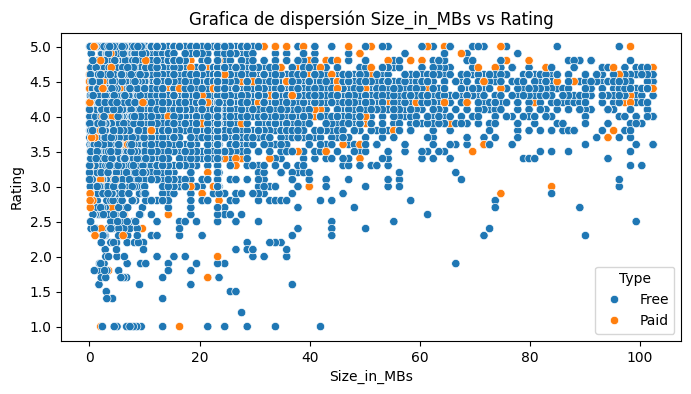

In [ ]:
scatters('Size_in_MBs', 'Rating')

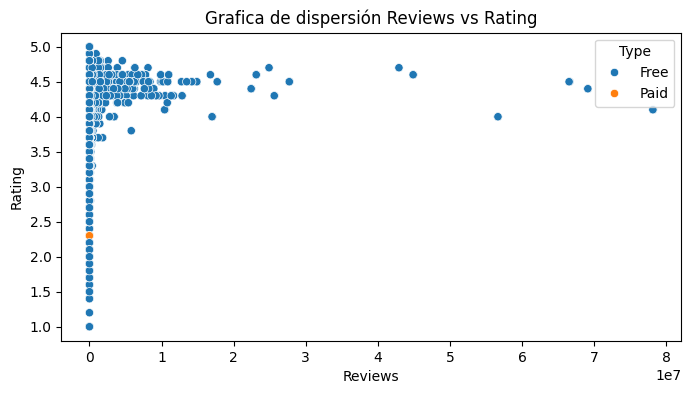

In [ ]:
scatters('Reviews', 'Rating')

Como hemos indicado anteriormente, las aplicaciones con mejor valoración tienden a tener mayor numero de reseñas.

## Conclusion analysis

Como pudimos observar llevamos a cabo numerosas tecnicas para poder representar de mejor manera el valor de los datos, a continuación comentaré sobre algunos puntos importantes del analisis:

- La columna *Rating*  nos indica que la mayoria de las aplicaciones cuentan con buenas calificaciones departe de sus usuarios.

- Las aplicaciones mejor calificadas estan en *Familiar*, son juegos los que se encuentran en primer lugar, pero estan catalogadas en el dataset como *Family*

- Las aplicaciones con mayor numero de reseñas y por ende de instalaciones, cinco puestos son aplicaciones de redes sociales, *facebook* de primero por ejemplo, seguido de apliciones de *juegos*

- En su gran mayoria las aplicaciones son gratuitas, ya que entran en categoria de redes sociales, juegos y familiares; Por otro lado, las aplicaciones pagas apuntan a finanzas y herramientas, serian corporaciones, negocios, emprendimientos, etc.

- Las aplicaciones preinstaladas pueden tener cifras de instalaciones muy altas no necesariamente debido a su popularidad o calidad, sino porque vienen por defecto en los dispositivos, por ejemplo *google photos*, *google maps*, etc.

## Pre processing

### Label encoder

In [ ]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        le.fit_transform(list(df[col].values))
        df[col] = le.transform(df[col].values)
    elif df[col].dtype == 'category':
        le.fit_transform(list(df[col].values))
        df[col] = le.transform(df[col].values)

Mediante este bucle *for*, iteramos entre las columnas identificando aquellas que sean *Object* y *Category*, posterior a eso cada columna indentificada le aplicaremos *Label Encoder* para asignarle un valor numerico a cada una de los  valores categoricos.

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_per_Install
0,5942,0,4.1,159,19.46,10000,0,0.0,1,9,527,107,14,0.015900
1,2035,0,3.9,967,14.34,500000,0,0.0,1,11,450,952,14,0.001934
2,7481,0,4.7,87510,8.91,5000000,0,0.0,1,9,106,424,14,0.017502
3,6748,0,4.5,215644,25.60,50000000,0,0.0,4,9,778,2582,17,0.004313
4,6002,0,4.3,967,2.87,100000,0,0.0,1,10,712,250,19,0.009670


<Axes: title={'center': 'Correlation of Seven Columns'}>

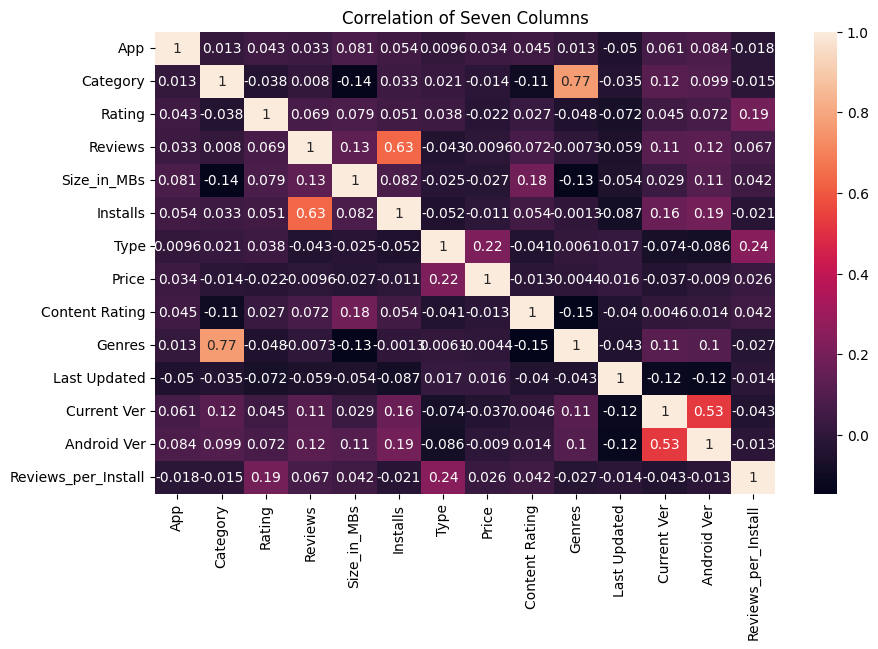

In [ ]:
plt.figure(figsize=(10,6))

plt.title("Correlation of Seven Columns")
heatmap(df.corr(),annot=True)

### Scaler

In [ ]:
df['Reviews_per_Install'] = log1p(df['Reviews_per_Install'])
df['Price'] = log1p(df['Price'])

s_scaler = StandardScaler()
r_scaler = RobustScaler()

df['Reviews'] = r_scaler.fit_transform(df[['Reviews']])
df['Installs'] = r_scaler.fit_transform(df[['Installs']])

df['Size_in_MBs'] = s_scaler.fit_transform(df[['Size_in_MBs']])

Aplicaremos diferentes tecnicas de escalamiento para nuestros features numericos:
- Transformacion logaritmica para aquellas columnas con distribuciones sesgadas.

- Standar scaler para aquellas columnas con menos presencia de outliers

- Robust scaler para aquellas columnas con mayor fuerte presencia de outliers.

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_per_Install
0,5942,0,4.1,-0.064069,-0.174887,-0.098196,0,0.0,1,9,527,107,14,0.015775
1,2035,0,3.9,-0.052705,-0.408409,0.000000,0,0.0,1,11,450,952,14,0.001932
2,7481,0,4.7,1.164449,-0.656071,0.901804,0,0.0,1,9,106,424,14,0.017351
3,6748,0,4.5,2.966545,0.105158,9.919840,0,0.0,4,9,778,2582,17,0.004304
4,6002,0,4.3,-0.052705,-0.931555,-0.080160,0,0.0,1,10,712,250,19,0.009624


# Machine Learning

## Train Test data

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_MBs', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Reviews_per_Install'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Rating', 'App', 'Category','Reviews', 'Installs', 'Content Rating', 'Genres', 'Last Updated', 'Android Ver', 'Current Ver', ])
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=760,
                                                    )

Definimos nuestras variables *X* y *y* para llevar a cabo el *train test split* dividir nuestro dataset en conjunto de prueba y entrenamiento y luego observamos como queda nuestros conjuntos.

## Regression models

## Ensembling

### Bagging regressor

Viene de la palabra bootstrap aggregation. Este método requiere que haya varios algoritmos corriendo en paralelo: cada uno seleccionará el modelo que mejor desempeño tenga y, al final, al juntar los distintos modelos que se han armado, se seleccionará aquel con «más votos» o el que seleccione algún algoritmo de ciencia de datos.

In [ ]:
model_bg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=6,
                                                            criterion='squared_error',
                                                            min_samples_split=2,
),
                           n_estimators= 200,
                           random_state= 760).fit(X_train, y_train)

In [ ]:
model_bg_pred = model_bg.predict(X_test)

mse = mean_squared_error(y_test, model_bg_pred)
r2_bg = r2_score(y_test, model_bg_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_bg)

Mean Squared Error (MSE): 0.23640877262451265
R-squared (R2): 0.11101003848301183


Como estimador para nuestros metaestimadores es *DecisionTreeRegressor*, entrenamos con nuestros conjuntos de entrenamiento y de prueba; Definimos nuestra variable de predicción y evaluamos con la metrica r2 arrojando un 0.12%, a pesar de modificar numerosas veces los hiperparametros.

### Boosting

 Es una técnica de ensamble en aprendizaje automático en la cual varios modelos débiles son entrenados para combinarse y producir un modelo más fuerte, la idea detrás del boosting es que cada modelo débil corrige los errores cometidos por los modelos anteriores en el ensamble, lo que finalmente conduce a un modelo más preciso.

In [ ]:
model_gbr = GradientBoostingRegressor(n_estimators=180,
                                    random_state= 760,
                                   loss='squared_error',

).fit(X_train, y_train)


In [ ]:
model_gbr_pred = model_gbr.predict(X_test)

mse = mean_squared_error(y_test, model_gbr_pred)
r2_gbr = r2_score(y_test, model_gbr_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_gbr)

Mean Squared Error (MSE): 0.23172129085091106
R-squared (R2): 0.1286368134764435


Mejorando el primer metaestimador con *GradientBoostingRegressor* con un 0.12% de desempeño, mejor que el primer metaestimador por poco, aunque muy bajo de igual manera.

### Bayes search

La búsqueda bayesiana utiliza la técnica de optimización bayesiana para modelar el espacio de búsqueda para llegar a valores de parámetros optimizados lo antes posible; El enfoque de búsqueda de Bayes utiliza los resultados de evaluaciones anteriores para muestrear nuevos candidatos que tienen más probabilidades de dar mejores resultados.

In [ ]:
search_spaces = {
    'max_depth': Integer(1, 20),  # Profundidad máxima del árbol
    'min_samples_split': Integer(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': Integer(1, 20),  # Número mínimo de muestras requeridas para ser una hoja
    'max_features': Real(0.1, 1.0),  # Fracción de características a considerar en cada división
    'splitter': ['best', 'random']  # Estrategia utilizada para elegir la división en cada nodo
}

In [ ]:
# Realizamos una búsqueda utilizando el algoritmo de optimización bayesiana de skopt:
n_iter_search = 20
bayes_search = BayesSearchCV(
    DecisionTreeRegressor(),  # Modelo de Decision Tree Regressor
    search_spaces,  # Espacios de búsqueda para los parámetros
    n_iter=n_iter_search,  # Número de iteraciones de búsqueda
    cv=5,  # Número de folds en la validación cruzada
    verbose=1  # Nivel de detalle durante el proceso de búsqueda
)

# Entrenamos el modelo a los datos de entrenamiento:
bayes_search.fit(X_train, y_train)

bayes_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

DecisionTreeRegressor(max_depth=10, max_features=0.9768167135593062,
                      min_samples_leaf=7, min_samples_split=11,
                      splitter='random')

In [ ]:
bayes_pred = bayes_search.predict(X_test)

mse = mean_squared_error(y_test, bayes_pred)
r2_bayes = r2_score(y_test, bayes_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_bayes)

Mean Squared Error (MSE): 0.23477272841009586
R-squared (R2): 0.11716220816380685


Luego de aplicar la busqueda Bayesiana y de escoger los mejores parametros, observamos mediante la metrica r2 el desempeño del 0.11%, bastante bajo

### TPOT

*TPOT*, que significa *Tree-based Pipeline Optimization Tool*, es una biblioteca de Python que automatiza el proceso de construcción de modelos de aprendizaje automático. Utiliza algoritmos genéticos para buscar automáticamente las mejores combinaciones de preprocesamiento de datos y modelos de aprendizaje automático

In [ ]:
tpot_reg = TPOTRegressor(
    generations=4,        # Número de generaciones para evolucionar los modelos
    population_size=10,  # Tamaño de la población de modelos en cada iteración
    verbosity=2,          # Nivel de detalle durante el proceso de entrenamiento
    offspring_size=100,   # Tamaño de la prole en cada iteración
    scoring='r2',         # Métrica para evaluar los modelos
    cv=5                  # Número de folds en la validación cruzada
)

tpot_reg.fit(X_train, y_train)


Optimization Progress:   0%|          | 0/410 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.10940974462091754

Generation 2 - Current best internal CV score: 0.10940974462091754

Generation 3 - Current best internal CV score: 0.11067750123940263

Generation 4 - Current best internal CV score: 0.11103621205110092

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=1.0, min_samples_leaf=17, min_samples_split=11, n_estimators=100)


TPOTRegressor(generations=4, offspring_size=100, population_size=10,
              scoring='r2', verbosity=2)

In [ ]:
best_model = tpot_reg.fitted_pipeline_

In [ ]:
tpot_pred = tpot_reg.predict(X_test)

mse = mean_squared_error(y_test, tpot_pred)
r2_tpot = r2_score(y_test, tpot_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2_tpot)

Mean Squared Error (MSE): 0.2306561911141652
R-squared (R2): 0.1326420073762713


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Mediante el TPOT en este caso para un problema de regresión, entrenamos con nuestros conjuntos de prueba y entrenamiento, nos arroja un desempeño mediante la metrica r2 con casi un 13%, uno de los desempeños mas altos siendo igual bastante bajo.

## Classification

No tuvimos buenos resultados mediante un problema de regresión, hare unas pruebas pero de clasificación

In [ ]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

Primero los conjuntos de entrenamiento y de prueba hay que convertirlos a valores enteros

### Random forest classifier

In [ ]:
rf_clf = RandomForestClassifier(max_depth=2,)
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier(max_depth=2)

In [ ]:
rfc_pred = rf_clf.predict(X_test)
as_rfc = accuracy_score(y_test_int, rfc_pred)
print("Accuracy:", as_rfc)

Accuracy: 0.7492973580663294


Usaremos bosque aleatorio como primer modelo de clasificación, definimos la variable de predicción y imprimimos la precisión del modelo

### Bagging Classifier

In [ ]:
model_bc = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,

),
                           n_estimators= 100,
                           random_state= 760).fit(X_train, y_train_int)

In [ ]:
bc_pred = model_bc.predict(X_test)
bg_as = accuracy_score(y_test_int, bc_pred)
print("Accuracy:", bg_as)

Accuracy: 0.7492973580663294


Usaremos dos de los mismos metodos de Ensembling, primeramente el *BaggingCLassifier*, usando arbol de decisión como estimador, definimos la variable predictora y imprimimos la precisión

### Boosting classifier

In [ ]:
model_gbc = GradientBoostingClassifier(n_estimators=100,
                                    random_state= 760,
                                    criterion='squared_error',

).fit(X_train, y_train_int)

In [ ]:
gbc_pred = model_gbc.predict(X_test)
as_gbc = accuracy_score(y_test_int, gbc_pred)
print("Accuracy:", as_gbc)

Accuracy: 0.7436762225969646


Por ultimo el *Boosting*, modifico un poco los hiperparametros y luego imprimimos la precisión

## Comparative model


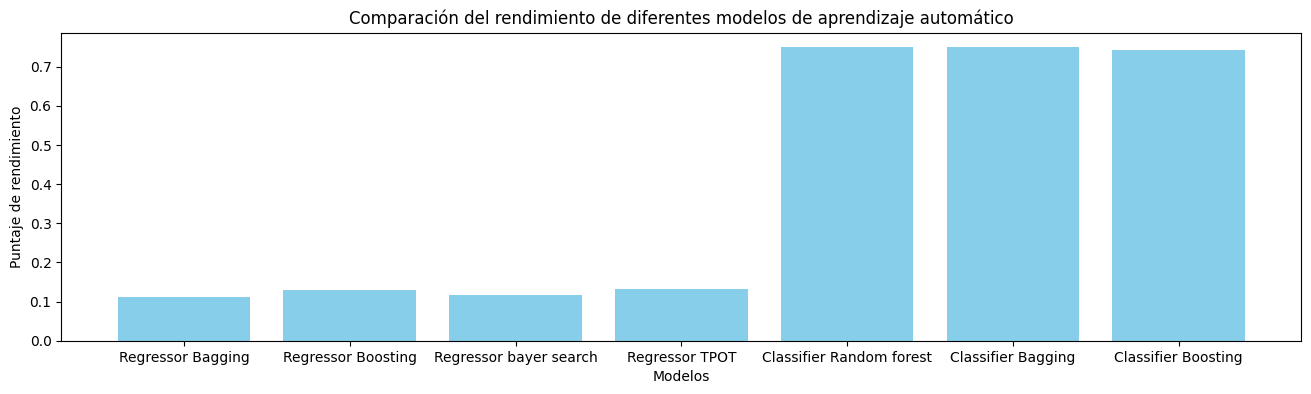

In [ ]:
# Define los nombres de los modelos y sus puntajes de rendimiento
model_names = ['Regressor Bagging', 'Regressor Boosting', 'Regressor bayer search', 'Regressor TPOT', 'Classifier Random forest', 'Classifier Bagging', 'Classifier Boosting']
performance_scores = [r2_bg, r2_gbr, r2_bayes, r2_tpot, as_rfc, bg_as, as_gbc]

plt.figure(figsize=(16, 4))
plt.bar(model_names, performance_scores, color='skyblue')

plt.xlabel('Modelos')
plt.ylabel('Puntaje de rendimiento')
plt.title('Comparación del rendimiento de diferentes modelos de aprendizaje automático')

# Muestra la gráfica
plt.show()

Acá graficamos los desempeños de los modelos ya sea de regresión y clasificación y comparamos, claramente tenemos un mejor desempeño en nuestros modelos de clasificación, con mas del 70% de precisión.

## Make prediction

In [ ]:
y_pred = model_gbc.predict(X_test)

df_comparison = DataFrame({'Predicción': y_pred, 'Valor real': y_test_int})

df_comparison.head(10)

,Predicción,Valor real
10159,4,2
10310,4,4
10778,4,4
3574,3,4
9219,4,3
9760,4,4
8640,4,4
1473,4,4
8723,4,4
1697,4,4


Definimos un nuevo dataframe de comparación entre el valor real y el valor predicho

## Save model


In [ ]:
path = 'model_best.joblib'
joblib.dump(model_gbc, path)

['model_best.joblib']

Acá guardamos nuestro modelo con mejor desempeño en nuestro computador y poder implementarlo en la industria